In [ ]:
pip install scikeras

In [ ]:
import keras
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam

# Forest Fire Problem

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving forestfires (1).csv to forestfires (1).csv


In [ ]:
fire = pd.read_csv('forestfires (1).csv')

In [ ]:
fire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
fire[fire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
fire2 = fire.drop_duplicates()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
coder = LabelEncoder()
scaler = StandardScaler()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

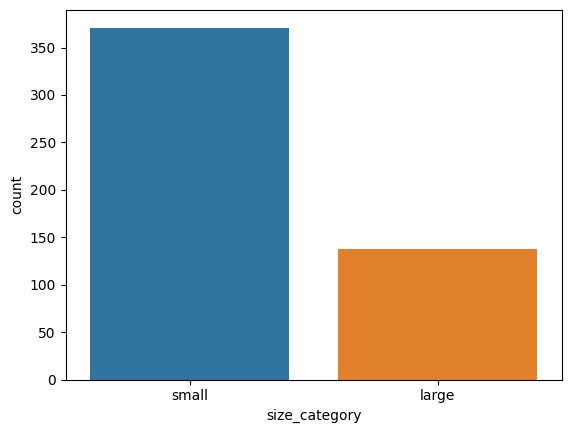

small    371
large    138
Name: size_category, dtype: int64

In [ ]:
sns.countplot(x='size_category',data=fire2)
plt.xlabel('size_category')
plt.ylabel('count')
plt.show()
fire2['size_category'].value_counts()

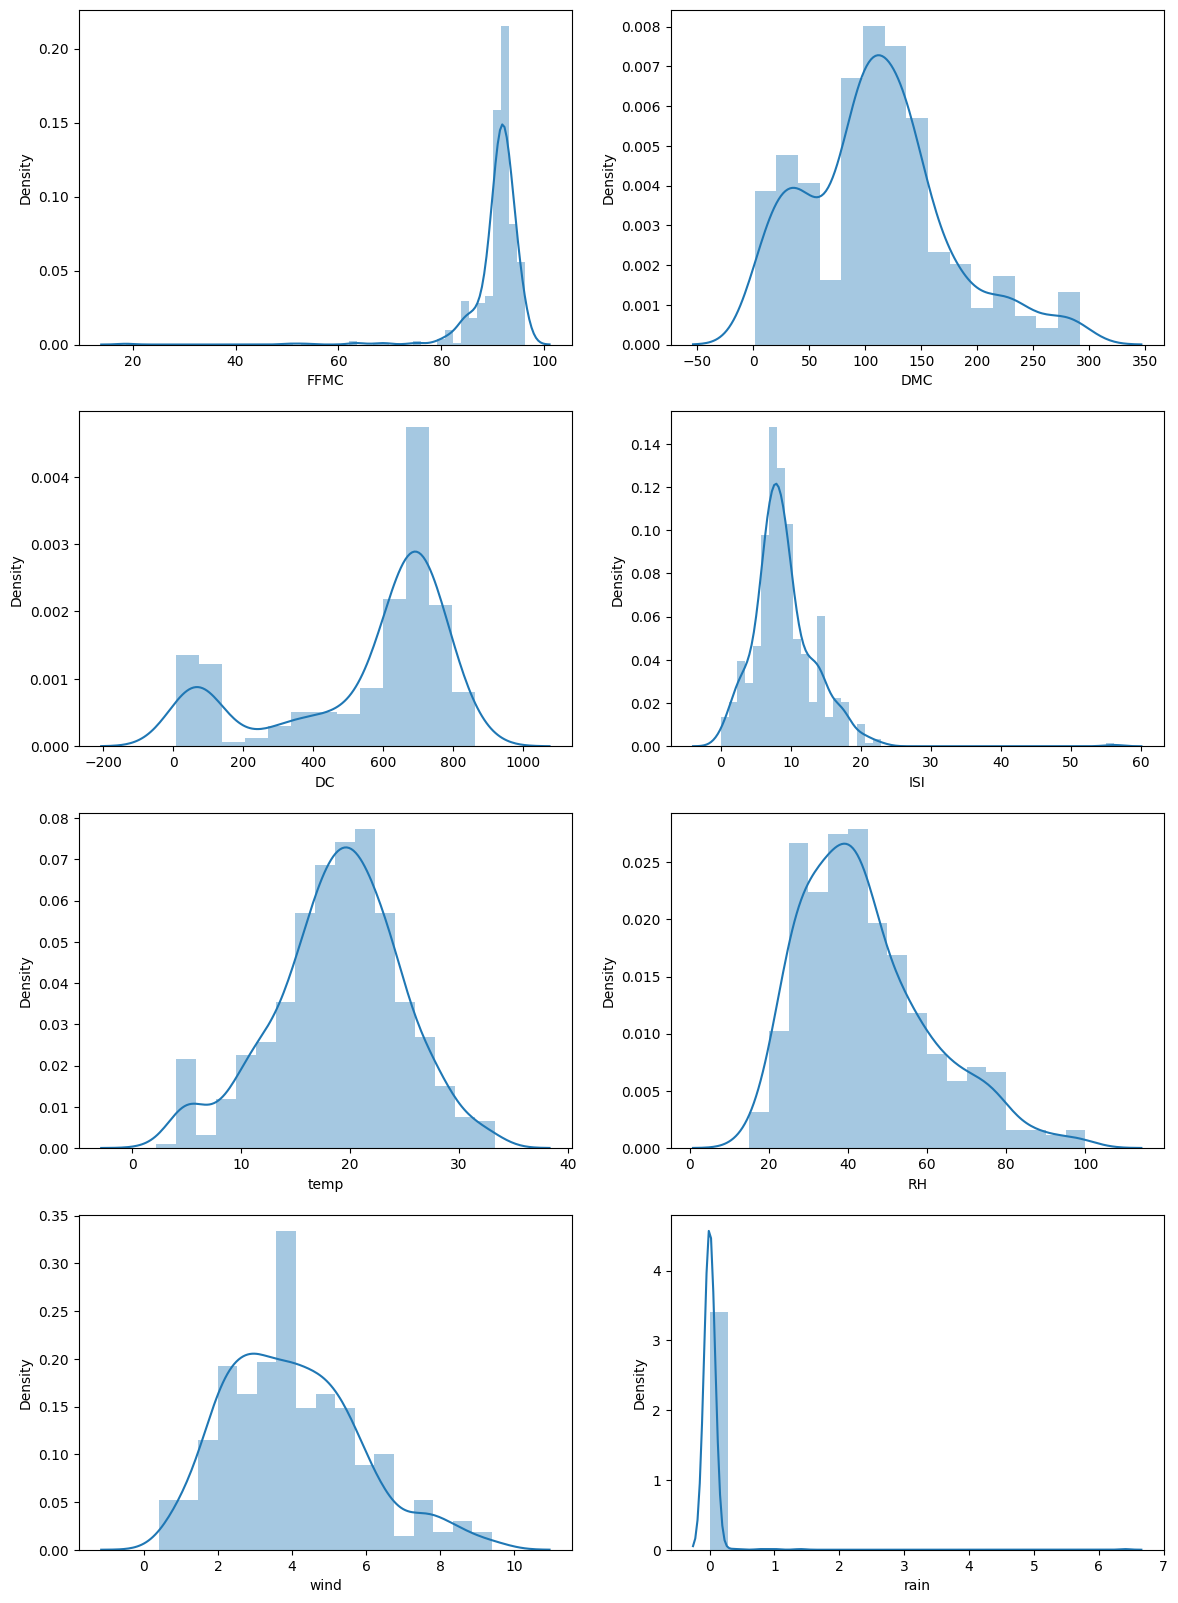

In [101]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.distplot(fire2.FFMC, ax = ax[0,0])
sns.distplot(fire2.DMC, ax = ax[0,1])
sns.distplot(fire2.DC, ax = ax[1,0])
sns.distplot(fire2.ISI, ax = ax[1,1])
sns.distplot(fire2.temp, ax = ax[2,0])
sns.distplot(fire2.RH, ax = ax[2,1])
sns.distplot(fire2.wind, ax = ax[3,0])
sns.distplot(fire2.rain, ax = ax[3,1])

plt.show()

In [ ]:
fire2['size_category'] = coder.fit_transform(fire2['size_category'])

In [ ]:
fire3 = fire2.drop(['month', 'day'], axis = 1)

In [ ]:
x = np.array(fire3.iloc[:,0:28])
y = np.array(fire3.iloc[:,28])

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [ ]:
x_norm = norm_func(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
history=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)

Epoch 1/120
29/29 [==============================] - 1s 31ms/step - loss: 0.3263 - accuracy: 0.8486 - val_loss: 0.3190 - val_accuracy: 0.8780
Epoch 2/120
29/29 [==============================] - 0s 7ms/step - loss: 0.3222 - accuracy: 0.8697 - val_loss: 0.3129 - val_accuracy: 0.8780
Epoch 3/120
29/29 [==============================] - 0s 4ms/step - loss: 0.3173 - accuracy: 0.8556 - val_loss: 0.3138 - val_accuracy: 0.8780
Epoch 4/120
29/29 [==============================] - 0s 4ms/step - loss: 0.3130 - accuracy: 0.8732 - val_loss: 0.3062 - val_accuracy: 0.8780
Epoch 5/120
29/29 [==============================] - 0s 5ms/step - loss: 0.3078 - accuracy: 0.8662 - val_loss: 0.3006 - val_accuracy: 0.8780
Epoch 6/120
29/29 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.8627 - val_loss: 0.2960 - val_accuracy: 0.8780
Epoch 7/120
29/29 [==============================] - 0s 4ms/step - loss: 0.2993 - accuracy: 0.8732 - val_loss: 0.2948 - val_accuracy: 0.8780
Epoch 8/120


In [89]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8998
accuracy: 89.98%


In [90]:
y_predict_test = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [91]:
y_predict_test

array([[9.9374247e-01],
       [9.9812067e-01],
       [9.9868155e-01],
       [9.9651557e-01],
       [4.8933629e-02],
       [9.9801493e-01],
       [9.9652874e-01],
       [9.9789006e-01],
       [9.7853750e-01],
       [2.7280456e-01],
       [9.9796832e-01],
       [9.9763513e-01],
       [8.2681418e-06],
       [9.9750477e-01],
       [9.9352199e-01],
       [4.0151560e-01],
       [9.9316615e-01],
       [9.9709088e-01],
       [7.7366583e-02],
       [9.9859256e-01],
       [4.7139700e-05],
       [9.3408866e-04],
       [9.9824864e-01],
       [9.9794048e-01],
       [9.9660772e-01],
       [9.9795133e-01],
       [9.9657065e-01],
       [9.9495727e-01],
       [9.9871445e-01],
       [9.9312937e-01],
       [9.9593896e-01],
       [9.9567395e-01],
       [9.9807465e-01],
       [9.9613273e-01],
       [9.9586368e-01],
       [3.6605150e-02],
       [9.9810588e-01],
       [3.5438204e-06],
       [3.7266498e-06],
       [4.0003687e-01],
       [9.9685097e-01],
       [9.832963

In [92]:
type(y_predict_test)

numpy.ndarray

In [93]:
type(y_test)

numpy.ndarray

In [94]:
y_predict_test.dtype

dtype('float32')

In [95]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [96]:
preds = pd.DataFrame(y_predict_test, columns =['y_predict_test'])

In [97]:
preds.head()

,y_predict_test
0,0.993742
1,0.998121
2,0.998682
3,0.996516
4,0.048934


In [98]:
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

In [99]:
preds['y_predict_test'] = preds['y_predict_test'].apply(probToBinary)

In [100]:
preds.head()

,y_predict_test
0,1
1,1
2,1
3,1
4,0
